# Who's the Better Carry: ADC or Midlaner?

**Name(s)**: Katelyn Villamin and Nancy Shen

**Website Link**: (your website link)

In [51]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from dsc80_utils import *

## Step 1: Introduction

In [52]:
# TODO

Which role carries the most in winning teams: ADCs or Midlanders

Things to consider: 
- deaths per minute
- kills per minute
- KDA
- cs per minute (gold)
- Winning teams only 
- double/triple/quadra/penta kills 

## Step 2: Data Cleaning and Exploratory Data Analysis

In [ ]:
# TODO
league_fp = Path('data') / '2022_LoL_esports_match_data_from_OraclesElixir.csv'
league = pd.read_csv(league_fp, low_memory=False)
#isolate only the winning team stats

#make a df with the necessary columns
columns_needed = ['league','position', 'kills', 'deaths', 'assists','doublekills', 'damagetochampions', 'dpm', 'earnedgold', 'earned gpm', 'firstbloodkill', 'result', 'year']
league = league[columns_needed]

#change all the position column values that are 'bot' to 'adc' for clarity
league['position'] = league['position'].str.replace('bot', 'adc')

#change column names to more appropriate ones
league.rename(columns={"damagetochampions": "total damage dealt", "earnedgold": "total gold earned", "earned gpm": "gpm", "firstbloodkill": "first blood kill"}, inplace=True)


#make all position column entries lower case and getting only the 'bot' and 'mid' positions
league_midadc = league[(league['position'].str.lower() == 'adc') | (league['position'].str.lower() == 'mid')]

league

,league,position,kills,deaths,assists,doublekills,total damage dealt,dpm,total gold earned,gpm,first blood kill,result
0,LCKC,top,2,3,2,0.00000000,15768.00000000,552.29420000,7164.00000000,250.92820000,0.00000000,0
1,LCKC,jng,2,5,6,0.00000000,11765.00000000,412.08410000,5368.00000000,188.02100000,0.00000000,0
2,LCKC,mid,2,2,3,0.00000000,14258.00000000,499.40460000,5945.00000000,208.23120000,0.00000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
148989,DCup,sup,2,1,13,NaN,10950.00000000,369.51630000,4811.00000000,162.35100000,0.00000000,1
148990,DCup,team,8,21,16,NaN,47579.00000000,1605.59060000,26462.00000000,892.98090000,NaN,0
148991,DCup,team,21,8,49,NaN,77748.00000000,2623.66700000,39998.00000000,1349.76380000,NaN,1


| Column | Description|
| --- | --- |
| `'league'` | The league in which the players and teams play in |
| `'position'` | The role of the player in the game |
| `'kills'` | Total number of kills a player has in a game |
| `'deaths'` | Total number of times a player dies in a game |
| `'assists'` | Total number of assits a player has in a game |
| `'doublekills'` | Total number of times a player kills an two opponents consecutively |
| `'total damage dealt'` | Total damage dealt to enemy champions by player|
| `'dpm'` | Average damage dealt to enemy champions per minute by player|
| `'total gold earned'` | Total gold earned by player in a game (excludes starting gold and inherent gold generation) |
| `'gpm'` | Average gold earned per minute by player (excludes starting gold and inherent gold generation) |
| `'first blood kill'` | Whether the player got the first kill
| `'result'` | Whether the team won that game 

**Univariate Analysis**

distribution of kills 

distribution of total damage dealt 

each graph will have two bell curves one for mid one for bot

In [54]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

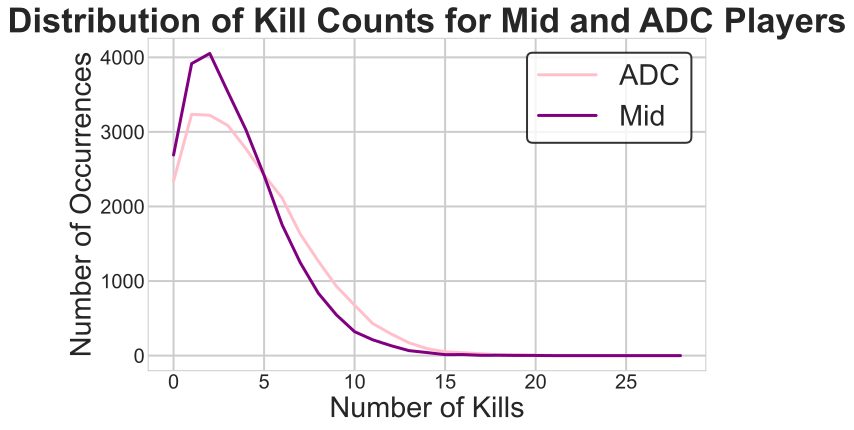

In [55]:
mid = league_midadc[league_midadc['position'] == 'mid']['kills'].value_counts()
adc = league_midadc[league_midadc['position'] == 'adc']['kills'].value_counts()

labels = ['mid', 'adc']
data = [mid, adc]

df = pd.DataFrame()
df['adc'] = adc
df['mid'] = mid
df['mid'] = df['mid'].fillna(0)
df = df.reset_index()
df.rename(columns={"index":"num kills"}, inplace=True)
df['total'] = df['adc'] + df['mid']
df = df.sort_values(by='num kills')

# Set a style for the plot
plt.style.use('seaborn-whitegrid')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['num kills'], df['adc'], label='ADC', linestyle='-', color='pink')
plt.plot(df['num kills'], df['mid'], label='Mid', linestyle='-', color='purple')

# Adding labels and title
plt.xlabel("Number of Kills", fontsize= 'large')
plt.ylabel("Number of Occurrences", fontsize= 'large')
plt.title('Distribution of Kill Counts for Mid and ADC Players', fontsize= 'x-large', fontweight= 'bold')

plt.xticks(fontsize= 'small')
plt.yticks(fontsize= 'small')

# Adding legend
legend = plt.legend(["ADC", "Mid"], loc='upper right', frameon=True, edgecolor='black', facecolor='white', fontsize= 'large')



# Display the plot
plt.show()

**Bivariate Analysis**
- See if there is a linear relationship between damage per minute and total damage
- Reason: Some people argue differently about which is more important

In [56]:
league_midadc["first blood kill"] = league_midadc["first blood kill"].astype(bool)
league_midadc[league_midadc['first blood kill'] == True]

,league,position,kills,deaths,assists,doublekills,total damage dealt,dpm,total gold earned,gpm,first blood kill,result
62,LCKC,mid,4,3,7,0.00000000,26603.00000000,641.55140000,9882.00000000,238.31190000,True,0
79,LPL,mid,2,2,1,NaN,18124.00000000,574.45320000,9167.00000000,290.55470000,True,0
92,LCKC,adc,4,0,2,2.00000000,17931.00000000,532.60400000,10515.00000000,312.32670000,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
148898,DCup,mid,3,5,7,NaN,20430.00000000,542.86980000,8126.00000000,215.92560000,True,1
148922,DCup,mid,2,4,3,NaN,22073.00000000,686.20730000,7453.00000000,231.69950000,True,0
148982,DCup,mid,5,3,3,NaN,11732.00000000,395.90550000,7442.00000000,251.13610000,True,0


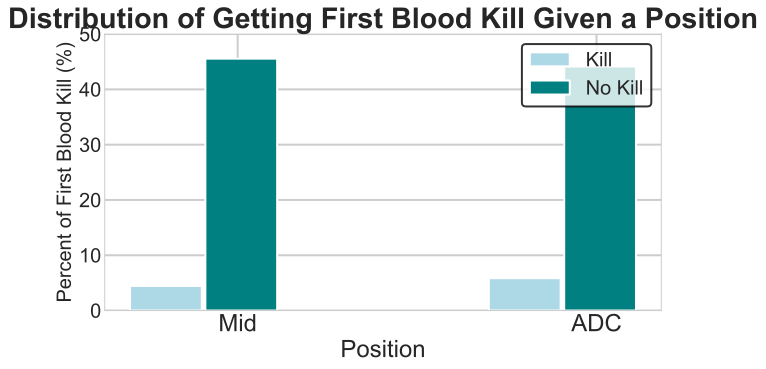

In [57]:
mid_first= league_midadc[(league_midadc['position']== 'mid') & (league_midadc['first blood kill']== True) ]
adc_first= league_midadc[(league_midadc['position']== 'adc') & (league_midadc['first blood kill']== True) ]

mid_nofirst= league_midadc[(league_midadc['position']== 'mid') & (league_midadc['first blood kill']== False) ]
adc_nofirst= league_midadc[(league_midadc['position']== 'adc') & (league_midadc['first blood kill']== False) ]
total=league_midadc['first blood kill'].count()


mid_prop= [(mid_first['first blood kill'].count()/total)*100, (adc_first['first blood kill'].count()/total)*100]
adc_prop= [(mid_nofirst['first blood kill'].count()/total)*100, (adc_nofirst['first blood kill'].count()/total)*100]

plt.xlabel("Position", fontsize= 'medium')
plt.ylabel("Percent of First Blood Kill (%)", fontsize= 'small')
plt.title("Distribution of Getting First Blood Kill Given a Position", fontsize= 'large', fontweight= 'bold')

x = np.arange(2)
width = 0.2

# Shifting the right bars closer to the left
plt.bar(x - 0.2, mid_prop, width, color='lightblue')
plt.bar(x + 0.01, adc_prop, width, color='teal')
plt.ylim(0, 50)

plt.xticks(x, ['Mid', 'ADC'], fontsize= 'medium')
plt.yticks(fontsize= 'small')
# Adding a bordered legend in the top right corner
legend = plt.legend(["Kill", "No Kill"], loc='upper right', frameon=True, edgecolor='black', facecolor='white', fontsize= 'small')

# Show the plot
plt.show()

**Interesting Aggregates**
We are looking at the average statistics of mid and adc roles as well as their win rate. (Columns: result== won, stats: kills, deaths, assists, total gold, total damage, average first blood)
- Rows: Position (Mid, ADC)

In [58]:
league['result'] = league['result'].astype(bool)
aggregates = league.groupby(['position', 'result']).mean()
pd.reset_option('display.max_columns')
league.head()

,league,position,kills,deaths,assists,doublekills,total damage dealt,dpm,total gold earned,gpm,first blood kill,result
0,LCKC,top,2,3,2,0.00000000,15768.00000000,552.29420000,7164.00000000,250.92820000,0.00000000,False
1,LCKC,jng,2,5,6,0.00000000,11765.00000000,412.08410000,5368.00000000,188.02100000,0.00000000,False
2,LCKC,mid,2,2,3,0.00000000,14258.00000000,499.40460000,5945.00000000,208.23120000,0.00000000,False
3,LCKC,adc,2,4,2,0.00000000,11106.00000000,389.00180000,6835.00000000,239.40460000,0.00000000,False
4,LCKC,sup,1,5,6,0.00000000,3663.00000000,128.30120000,2908.00000000,101.85640000,1.00000000,False


This table shows the mean statistics for ADC and mid players in dataset based on the result of the game (where False means that they lost, and True means that they won). Finding the means of these columns allows us to see which role carries more often.

## Step 3: Assessment of Missingness

columns nmar: doublekills vs league [each league's doublekills / total doublekills]

**Double Kills vs League**


When Double Kills is Missing. We use data of teams only

In [91]:
teams_only= league[league['position']== 'team']
teams_only.head()

,league,position,kills,deaths,assists,doublekills,total damage dealt,dpm,total gold earned,gpm,first blood kill,result
10,LCKC,team,9,19,19,0.00000000,56560.00000000,1981.08580000,28222.00000000,988.51140000,NaN,False
11,LCKC,team,19,9,62,6.00000000,79912.00000000,2799.01930000,33769.00000000,1182.80210000,NaN,True
22,LCKC,team,3,16,7,0.00000000,59579.00000000,1690.98390000,34688.00000000,984.52220000,NaN,False
23,LCKC,team,16,3,39,1.00000000,74855.00000000,2124.55060000,48063.00000000,1364.13430000,NaN,True
34,LPL,team,13,6,35,NaN,40086.00000000,1762.02200000,30167.00000000,1326.02200000,NaN,True


In [92]:
total = teams_only['doublekills'].sum()
prop_missing = (teams_only.groupby('league')['doublekills'].sum() / total).reset_index()
pd.options.display.float_format = '{:.8f}'.format
prop_missing.head()

,league,doublekills
0,CBLOL,0.02190819
1,CBLOLA,0.02048666
2,CDF,0.00905873
3,CT,0.00253644
4,DCup,0.00000000


When Double Kills is not Missing

In [93]:
def prob_impute(s):
    s = s.copy()
    
    # Step 1: Find the number of missing child heights for that gender.
    num_null = s.isna().sum()
    
    # Step 2: Sample num_null observed child heights for that gender.
    fill_values = np.random.choice(s.dropna(), num_null)
    
    # Step 3: Fill in missing values and return ser.
    s[s.isna()] = fill_values
    return s

team_filled = teams_only.copy()
team_filled= team_filled[['league', 'doublekills']]
team_filled['doublekills'] = (
    teams_only
    ['doublekills']
    .transform(prob_impute)
)
total= team_filled['doublekills'].sum()
prop_notmissing = (team_filled.groupby('league')['doublekills'].sum() / total).reset_index()
prop_notmissing

,league,doublekills
0,CBLOL,0.01869426
1,CBLOLA,0.01748127
2,CDF,0.00772981
...,...,...
46,VCS,0.02678083
47,VL,0.01405637
48,WLDs,0.01084552


In [95]:
observed_diff = teams_only.groupby('league')['doublekills'].mean().diff().abs().iloc[-1]
observed_diff

0.3056111806424697

In [108]:
n_repetitions = 100000
shuffled = teams_only.copy()

diff_means = []
for _ in range(n_repetitions):
    
    # Shuffling genders. 
    # Note that we are assigning back to the same DataFrame for performance reasons; 
    # see https://dsc80.com/resources/lectures/lec07/lec07-fast-permutation-tests.html.
    shuffled['league'] = np.random.permutation(shuffled['league'])
    
    # Computing and storing the TVD.
    pivoted = (
        shuffled
        .pivot_table(index='league', columns='doublekills', aggfunc='size')
    )
    
    pivoted = pivoted / pivoted.sum()
    diff_mean = shuffled.groupby('league')['doublekills'].mean().diff().abs().iloc[-1]
    diff_means.append(diff_mean)

KeyboardInterrupt: 

In [ ]:
fig = px.histogram(pd.DataFrame(diff_means), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the Absolute Difference in Means')
fig.add_vline(x=observed_diff, line_color='red', line_width=1, opacity=1)
fig.add_annotation(text=f'<span style="color:red">Observed Absolute Difference in Means = {round(observed_diff, 2)}</span>',
                   x=2 * observed_diff, showarrow=False, y=0.07)

In [107]:
np.mean(np.array(diff_means) >= observed_diff)
#We reject the null? So it does depend

0.0241

**DoubleKills vs Year**

When DoubleKills is Missing

In [ ]:
prop_missing = (teams_only.groupby('year')['doublekills'].sum() / total).reset_index()
pd.options.display.float_format = '{:.8f}'.format
prop_missing.head()

## Step 4: Hypothesis Testing

In [ ]:
# TODO


## Step 5: Framing a Prediction Problem

In [ ]:
# which is a more accurate measure for damage contribution: dpm vs. total damage dealt?
# Given that the adc or mid gets first blood kill, what is the likelihood of them winning the game?

## Step 6: Baseline Model

In [ ]:
# TODO

## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO